In [1]:
import pandas as pd
import sys 
sys.path.insert(0, '/10 A KAI 2/week 1/Stock_Price_Analysis/')

In [2]:
from src.text_analysis import TextAnalyzer
from src.Descrip_anal import Descriptives

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [4]:
result = TextAnalyzer(df)

In [5]:
df = result.remove_unname()

In [6]:
df['stock'].unique()

array(['A', 'AA', 'AAC', ..., 'ZU', 'ZUMZ', 'ZX'], dtype=object)

##### do sentiment analysis on the headline col after removing stopwords 

In [7]:
result.sentiment_analysis()

,headline,url,publisher,date,stock,cleaned_headline,sentiment,polarity
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,stocks hit 52 week highs friday,Neutral,0.00
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,stocks hit 52 week highs wednesday,Neutral,0.00
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,71 biggest movers friday,Neutral,0.00
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,46 stocks moving friday mid day session,Neutral,0.00
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,b securities maintains neutral agilent technol...,Neutral,0.00
...,...,...,...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,top narrow based indexes august 29,Positive,0.15
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,recap wednesday top percentage gainers losers,Positive,0.15
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,update oppenheimer color china zenix auto init...,Neutral,0.00
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,oppenheimer initiates china zenix outperform 8 pt,Neutral,0.00


##### extract top 10 keywords from the headline in word lavel using TFIDF and bigram lavel 

In [8]:
wor, big = result.keyword_extraction()

In [9]:
wor

,Keyword,TF-IDF Score
0,earnings,78328.184675
1,eps,62401.313224
2,est,53859.726234
3,market,94797.566144
4,reports,64795.431428
5,sales,47344.869661
6,shares,93176.130946
7,stocks,149539.632769
8,update,75366.829457
9,vs,65826.306491


In [10]:
big

,Bigram,Count
0,"(eps, 0)",83791
1,"(52, week)",51006
2,"(vs, 0)",47735
3,"(price, target)",47274
4,"(benzinga, top)",44259
5,"(stocks, moving)",40032
6,"(mid, day)",37324
7,"(market, update)",33101
8,"(earnings, scheduled)",32054
9,"(initiates, coverage)",28993


In [11]:
big['Bigram']=big['Bigram'].apply(lambda x: ' '.join(x))


In [12]:
big

,Bigram,Count
0,eps 0,83791
1,52 week,51006
2,vs 0,47735
3,price target,47274
4,benzinga top,44259
5,stocks moving,40032
6,mid day,37324
7,market update,33101
8,earnings scheduled,32054
9,initiates coverage,28993


##### plot extracted top word and bigram word using bar graph

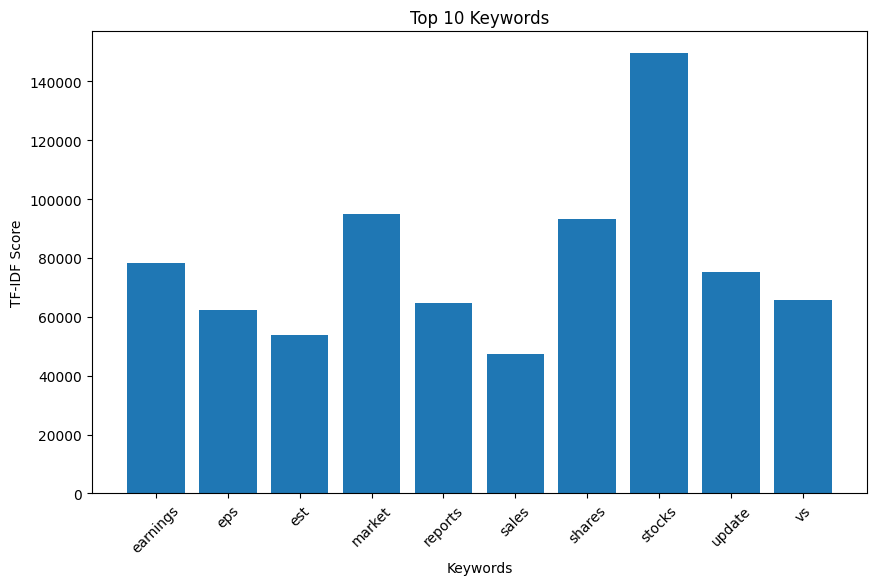

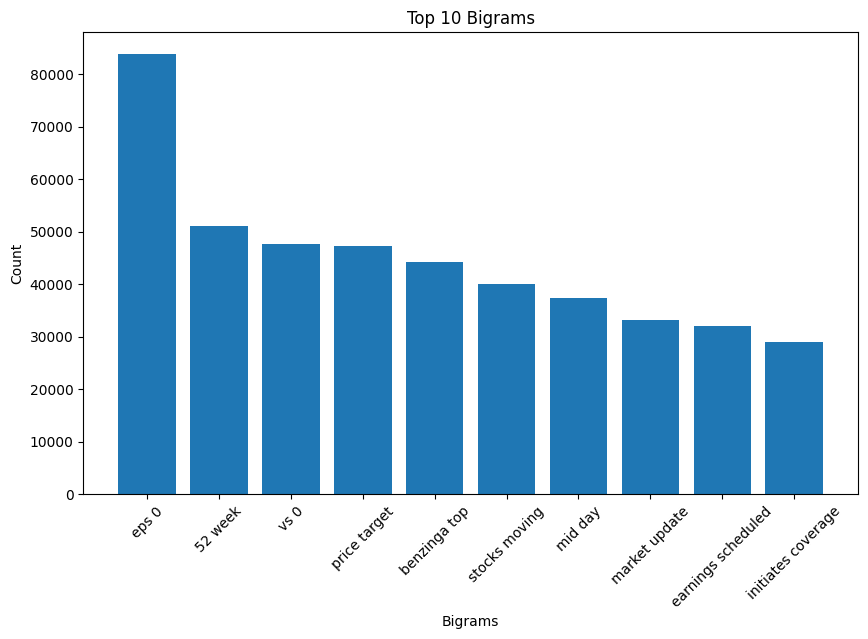

In [13]:
result.plot_keyword_extraction(wor,big)

##### filtered email as a publisher name and filter the domain from the email

In [14]:
result.filter_publishers_with_email()

,headline,url,publisher,date,stock,cleaned_headline,sentiment,polarity,domain
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,cfra maintains hold agilent technologies lower...,Neutral,0.000000,benzinga.com
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,ubs maintains neutral agilent technologies rai...,Neutral,0.000000,benzinga.com
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,wells fargo maintains overweight agilent techn...,Neutral,0.000000,benzinga.com
11,SVB Leerink Maintains Outperform on Agilent Te...,https://www.benzinga.com/news/20/05/16092270/s...,vishwanath@benzinga.com,2020-05-22 00:00:00,A,svb leerink maintains outperform agilent techn...,Neutral,0.000000,benzinga.com
22,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/04/15897306/u...,vishwanath@benzinga.com,2020-04-28 00:00:00,A,ubs maintains neutral agilent technologies low...,Neutral,0.000000,benzinga.com
...,...,...,...,...,...,...,...,...,...
1404049,"Based on Options Pricing, Here's 5 Companies' ...",https://www.benzinga.com/markets/options/13/04...,bret.kenwell@benzinga.com,2013-04-24 00:00:00,ZNGA,based options pricing 5 companies implied move...,Neutral,0.000000,benzinga.com
1404050,ZNGA (Implied Move): 3.50 Straddle Price is $0...,https://www.benzinga.com/markets/options/13/04...,bret.kenwell@benzinga.com,2013-04-24 00:00:00,ZNGA,znga implied move 3 50 straddle price 0 50 14 ...,Neutral,0.000000,benzinga.com
1404780,Zoe's Kitchen Shares Indicated Up 1% Premarket...,https://www.benzinga.com/news/18/08/12237400/z...,luke@benzinga.com,2018-08-21 09:18:16-04:00,ZOES,zoe kitchen shares indicated 1 premarket light...,Positive,0.268182,benzinga.com
1406325,Zumiez Sees FY20 EPS $0.01-$0.07 vs $0.08 Est....,https://www.benzinga.com/news/20/03/15541915/z...,luke@benzinga.com,2020-03-12 00:00:00,ZUMZ,zumiez sees fy20 eps 0 01 0 07 vs 0 08 est sal...,Neutral,0.000000,benzinga.com


##### count articles that erouten by each domain 

In [15]:
result.count_top_domains()

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


##### plot email domain counts 

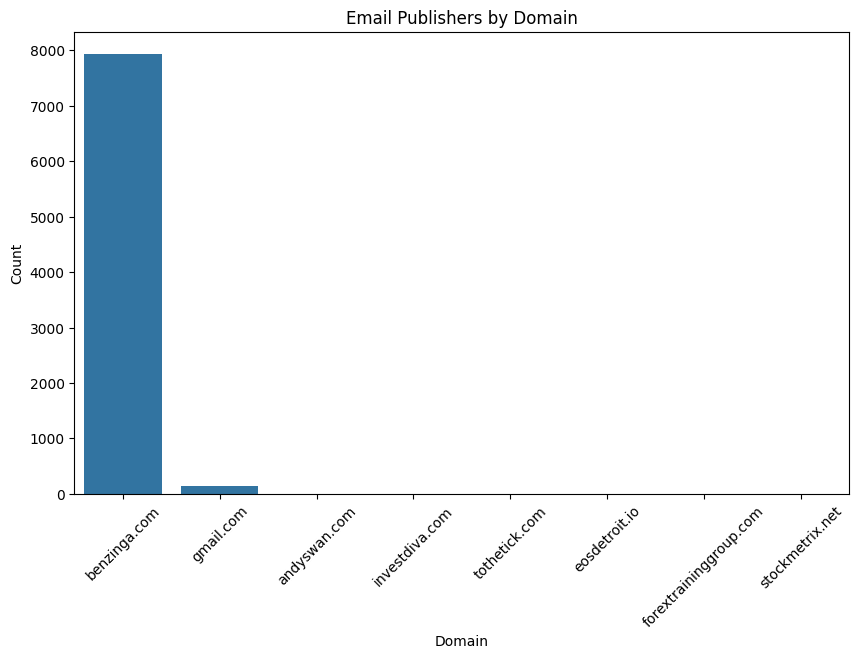

In [16]:
result.plot_email_have_publisher()